###  Pymaceuticals Inc - Aalvarez

In [1]:
#Created on Sat Aug 25 20:33:57 2018
#@author: anthonyalvarez
#Test Files: Pharm_00.ipynb - Pharm_05.ipynb

* Referenced material:
 * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
 * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
 * https://stackoverflow.com/questions/31235745/python-querying-tables-from-database-and-having-conditions-in-data-frame
 * https://pythonforbiologists.com/when-to-use-aggregatefiltertransform-in-pandas/
 * https://stackoverflow.com/questions/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python
 * https://stackoverflow.com/questions/17141558/how-to-sort-a-dataframe-in-python-pandas-by-two-or-more-columns
 * https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining
 * https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns
 * https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html
 * https://stackoverflow.com/questions/44890713/selection-with-loc-in-python
 * https://stackoverflow.com/questions/17241004/pandas-how-to-get-the-data-frame-index-as-an-array
 * https://stackoverflow.com/questions/39038358/function-chaining-in-python


---

## Dependencies

In [3]:
#dependencies
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Warnings

In [4]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

## File Operations

In [5]:
#data sources
datafolder = 'data/'

file1 = 'clinicaltrial_data.csv'
file2 = 'mouse_drug_data.csv'

#read both files into dataframes
clinical_df = pd.read_csv(datafolder + file1)
mouse_df = pd.read_csv(datafolder + file2)


## Data Verification

In [9]:
#view physical data
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
#clinical_df.to_csv('clinical_df.csv', header=True)
#mouse_df.to_csv('mouse_df.csv', header=True)

#view clinical data
clinical_df.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [10]:
#view mouse data
mouse_df.head(2)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn


In [11]:
#merge the data on clinical trials
combined_df = pd.merge(clinical_df, mouse_df, on="Mouse ID")

#sort the columns
combined_df.sort_values(["Mouse ID","Timepoint"], ascending=True, inplace=True)

combined_df.head(2)

#view merged info
#combined_df.info()

#get the row count
initial_rowcount = len(combined_df)
#print(initial_rowcount)

In [12]:
#clear and reset the index
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
combined_df = combined_df.reset_index()
del combined_df['index']
#combined_df.head()

## DATA CLEANSING 
* verify the data makes sense
 * due to duplicate records and totals/numbers not making sense

In [13]:
#Clinical DF rows: 1893
#Mouse DF rows: 250
#Merged DF rows: 1906
print(f'Clinical DF rows: {len(clinical_df["Mouse ID"])}')
print(f'Mouse DF rows: {len(mouse_df["Mouse ID"])}')
print(f'Merged DF rows: {len(combined_df["Mouse ID"])}')

#something is wrong. we have more rows than we started with.
#there must be duplicate data someplace. MORE RESEARCH.
#output for visual 
#combined_df.to_csv('combined_df.csv', header=True)

#imported to sql for due diligence and verification.
#issue verified

#FOUND AN ISSUE WITH MOUSE ID = g989
#MOUSE HAS 2 Different drugs associated with it causing duplicate rows???


Clinical DF rows: 1893
Mouse DF rows: 250
Merged DF rows: 1906


In [14]:
#Distinct Count of Drugs by MOUSE ID - aggregate summary
#https://stackoverflow.com/questions/18554920/pandas-aggregate-count-distinct
#df.groupby("date").agg({"duration": np.sum, "user_id": pd.Series.nunique})
#using response 97
distinct_count_df = combined_df.copy()
distinct_count_df = pd.DataFrame(distinct_count_df.groupby('Mouse ID').agg({'Drug': pd.Series.nunique}))
print(len(distinct_count_df))
distinct_count_df.head()

249


,Drug
Mouse ID,
a203,1
a251,1
a262,1
a275,1
a366,1


In [15]:
#search for ALL MICE causing disturbance in the data having a DISTINCT Drug count > 1
distinct_count_df.loc[distinct_count_df['Drug']>1]
#mouseid countofdistinctdrugs
#g989	2

#what to do with the anomaly?
#SOLUTION is in the Project Description:
#Your objective is to analyze the data to show how four treatments 
#(Capomulin, Infubinol, Ketapril, and Placebo)

,Drug
Mouse ID,
g989,2


In [16]:
#get a new dataframe using only the data we need. in this case instructions say to use 
#the specific following drugs: (Capomulin, Infubinol, Ketapril, and Placebo)
#Create a dataframe for the filtered data
#research: 
#https://stackoverflow.com/questions/11869910/pandas-filter-rows-of-dataframe-with-operator-chaining
#https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns
filtered_df = combined_df.copy()
filtered_pharma = filtered_df[
                                (filtered_df['Drug']=='Capomulin')
                                |
                                (filtered_df['Drug']=='Infubinol')
                                |
                                (filtered_df['Drug']=='Ketapril')
                                |
                                (filtered_df['Drug']=='Placebo')
                            ]

filtered_pharma.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,a203,0,45.000000,0,Infubinol
1,a203,5,48.508468,0,Infubinol
2,a203,10,51.852437,1,Infubinol


In [17]:
#reset index, get rid of INDEX or level_0 indices
#filtered_pharma = filtered_pharma.reset_index()
#del filtered_pharma['index']
#filtered_pharma.head()

In [18]:
filtered_rowcount = len(filtered_pharma)
print(f'Our initial row count was: {initial_rowcount}')
print(f'Our filtered row count is: {filtered_rowcount}')
#Our initial row count was: 1906
#Our filtered row count is: 777

Our initial row count was: 1906
Our filtered row count is: 777


In [20]:
#double check our data anomalies. it should not show since it is not using one of the four
#required drug values - Mouse ID: g989
len(filtered_pharma[(filtered_pharma['Mouse ID']=='g989')])


0

In [21]:
#rename the columns to a query friendly format because i hate spaces and parenthesis.
#todo: comeback later and rename the columns to original names
print(filtered_pharma.columns)
filtered_pharma = filtered_pharma.rename(columns={
                                                    'Mouse ID':'MouseId'
                                                    ,'Tumor Volume (mm3)':'TumorVolume'
                                                    ,'Metastatic Sites':'MetaSites'
                                                })

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')


In [22]:
#resort by timpoint for the first plot requirements
filtered_pharma.sort_values(["Timepoint","MouseId"], ascending=True, inplace=True)
#view renamed columns
filtered_pharma.head(2)

,MouseId,Timepoint,TumorVolume,MetaSites,Drug
0,a203,0,45.0,0,Infubinol
10,a251,0,45.0,0,Infubinol


In [23]:
#reset index, get rid of INDEX or level_0 indices
filtered_pharma = filtered_pharma.reset_index()
del filtered_pharma['index']
filtered_pharma.head()

,MouseId,Timepoint,TumorVolume,MetaSites,Drug
0,a203,0,45.0,0,Infubinol
1,a251,0,45.0,0,Infubinol
2,a262,0,45.0,0,Placebo
3,a457,0,45.0,0,Ketapril
4,a577,0,45.0,0,Infubinol


In [24]:
#create a working dataframe from clean data
main_df = filtered_pharma.copy()

print(len(main_df))

777


---
## Tumor Volume Changes Over Time
  * Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
---

In [23]:
#tumor response to treatment
#get the average tumor change over time
tumor_average_df = pd.DataFrame(main_df.groupby(['Drug','Timepoint']).mean())
#tumor_average_df.head(2)

#drop the MetaSites column
tumor_average_df = tumor_average_df[['TumorVolume']]
tumor_average_df.head(2)


TumorVolume
Drug      Timepoint             
Capomulin 0            45.000000
          5            44.266086

In [25]:
#dont forget the SEM is needed here as well
#tumor response to treatment
#find the sem of tumor change over time
tumor_sem_df = pd.DataFrame(main_df.groupby(['Drug','Timepoint']).sem())
#tumor_sem_df.head(2)

#drop the MetaSites column
tumor_sem_df = tumor_sem_df[['TumorVolume']]
tumor_sem_df.head(2)

TumorVolume
Drug      Timepoint             
Capomulin 0             0.000000
          5             0.448593

In [26]:
#pivot the table avg tumor table
tumor_volume = tumor_average_df.unstack(level = 0)
tumor_volume.head()


TumorVolume                                 
Drug        Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                             
0           45.000000  45.000000  45.000000  45.000000
5           44.266086  47.062001  47.389175  47.125589
10          43.084291  49.403909  49.582269  49.423329
15          42.064317  51.296397  52.399974  51.359742
20          40.716325  53.197691  54.920935  54.364417

In [27]:
#pivot the SEM table
tumor_error = tumor_sem_df.unstack(level = 0)
tumor_error.head()


TumorVolume                              
Drug        Capomulin Infubinol  Ketapril   Placebo
Timepoint                                          
0            0.000000  0.000000  0.000000  0.000000
5            0.448593  0.235102  0.264819  0.218091
10           0.702684  0.282346  0.357421  0.402064
15           0.838617  0.357705  0.580268  0.614461
20           0.909731  0.476210  0.726484  0.839609

In [28]:
#pivot the table avg tumor table
#tumor_average_df.stack(level = 0)

In [29]:
#get the values for the days on the XAXIS
xrange_df = pd.DataFrame(main_df.copy().drop_duplicates(['Timepoint'], keep="last"))

begin_range = xrange_df['Timepoint'].min()
print(f'Begin Range: {begin_range}')

end_range = xrange_df['Timepoint'].max()+5
print(f'End Range: {end_range}')

step_range = 5
print(f'Step Range: {step_range}')

#print(xrange_df['Timepoint'].min())
#print(xrange_df['Timepoint'].max())
#print((end_range+step_range))
#x_axis = np.arange(begin_range, end_range, step_range)
#x_axis

Begin Range: 0
End Range: 50
Step Range: 5


In [30]:
#chart info
charttitle = "Tumor Volume Change Over Time"
xTitle = "Time in Days"
yTitle = "Tumor Volume Growth in (mm3)"

x_limit = end_range
print(x_limit)

#x_axis = np.arange(xrange_df['Timepoint'].min(), xrange_df['Timepoint'].max(), 5)
#maybe add 5 to the end range to give us a nice number 0-50???
x_axis = np.arange(begin_range, end_range, step_range)
print(x_axis)

tumor_volume.head()

50
[ 0  5 10 15 20 25 30 35 40 45]


TumorVolume                                 
Drug        Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                             
0           45.000000  45.000000  45.000000  45.000000
5           44.266086  47.062001  47.389175  47.125589
10          43.084291  49.403909  49.582269  49.423329
15          42.064317  51.296397  52.399974  51.359742
20          40.716325  53.197691  54.920935  54.364417

In [31]:
tumor_volume.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 4 columns):
(TumorVolume, Capomulin)    10 non-null float64
(TumorVolume, Infubinol)    10 non-null float64
(TumorVolume, Ketapril)     10 non-null float64
(TumorVolume, Placebo)      10 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [32]:
#drug values
drug_capomulin = tumor_volume[('TumorVolume', 'Capomulin')]
drug_infubinol = tumor_volume[('TumorVolume', 'Infubinol')]
drug_ketapril = tumor_volume[('TumorVolume', 'Ketapril')]
drug_placebo = tumor_volume[('TumorVolume', 'Placebo')]

In [33]:
#sem values
sem_capomulin = tumor_error[('TumorVolume', 'Capomulin')]
sem_infubinol = tumor_error[('TumorVolume', 'Infubinol')]
sem_ketapril = tumor_error[('TumorVolume', 'Ketapril')]
sem_placebo = tumor_error[('TumorVolume', 'Placebo')]

In [1]:
plt.figure(figsize=(10,6))

#make handles instead 
scat_capomulin = plt.errorbar(x_axis, drug_capomulin, sem_capomulin, linestyle='--', marker='o', capthick=1, capsize=2, label='Capomulin')
scat_infubinol = plt.errorbar(x_axis, drug_infubinol, sem_infubinol, linestyle='--', marker='d', capthick=1, capsize=2, label='Infubinol')
scat_ketapril = plt.errorbar(x_axis, drug_ketapril, sem_ketapril, linestyle='--', marker='D', capthick=1, capsize=2, label='Ketapril')
scat_placebo = plt.errorbar(x_axis, drug_placebo, sem_placebo, linestyle='--', marker='8', capthick=1, capsize=2, label='Placebo')



#scatter plot 1
charttitle = "Tumor Volume Change Over Time"
xTitle = "Time in Days"
yTitle = "Tumor Volume Growth in (mm3)"

plt.title(charttitle)
plt.xlabel(xTitle)
plt.ylabel(yTitle)
plt.xlim(0, x_limit)
#plt.ylim(0,75)

plt.xticks(x_axis)

plt.legend(handles=[scat_capomulin, scat_infubinol, scat_ketapril, scat_placebo], loc="best")

plt.grid()
#plt.plot()
plt.show()

IndentationError: expected an indented block (<ipython-input-1-717f7364f32e>, line 2)

---
## Metastatic Sites Change Over Time
  * Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
---

In [37]:
#get the cancer spread average over time
cs_avg_df = pd.DataFrame(main_df.groupby(['Drug','Timepoint']).mean())
#cancer_average_df.head(2)

#drop the MetaSites column
cs_avg_df = cs_avg_df[['MetaSites']]
cs_avg_df.head(2)


MetaSites
Drug      Timepoint           
Capomulin 0               0.00
          5               0.16

In [38]:

#get the cancer spread sem over time
cs_sem_df = pd.DataFrame(main_df.groupby(['Drug','Timepoint']).sem())
#tumor_sem_df.head(2)

#drop the MetaSites column
cs_sem_df = cs_sem_df[['MetaSites']]
cs_sem_df.head(2)

MetaSites
Drug      Timepoint           
Capomulin 0           0.000000
          5           0.074833

In [39]:
#pivot the table avg tumor table
cs_spread_avg = cs_avg_df.unstack(level = 0)
cs_spread_avg.head()


MetaSites                              
Drug      Capomulin Infubinol  Ketapril   Placebo
Timepoint                                        
0          0.000000  0.000000  0.000000  0.000000
5          0.160000  0.280000  0.304348  0.375000
10         0.320000  0.666667  0.590909  0.833333
15         0.375000  0.904762  0.842105  1.250000
20         0.652174  1.050000  1.210526  1.526316

In [40]:
#pivot the SEM table
cs_spread_sem = cs_sem_df.unstack(level = 0)
cs_spread_sem.head()


MetaSites                              
Drug      Capomulin Infubinol  Ketapril   Placebo
Timepoint                                        
0          0.000000  0.000000  0.000000  0.000000
5          0.074833  0.091652  0.098100  0.100947
10         0.125433  0.159364  0.142018  0.115261
15         0.132048  0.194015  0.191381  0.190221
20         0.161621  0.234801  0.236680  0.234064

In [41]:
#get the values for the days on the XAXIS
xrange_cs_df = pd.DataFrame(main_df.copy().drop_duplicates(['Timepoint'], keep="last"))

begin_cs_range = xrange_cs_df['Timepoint'].min()
print(f'Begin Range: {begin_cs_range}')

end_cs_range = xrange_cs_df['Timepoint'].max()+1
print(f'End Range: {end_cs_range}')

step_cs_range = 5
print(f'Step Range: {step_cs_range}')

Begin Range: 0
End Range: 46
Step Range: 5


In [42]:
cs_spread_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 45
Data columns (total 4 columns):
(MetaSites, Capomulin)    10 non-null float64
(MetaSites, Infubinol)    10 non-null float64
(MetaSites, Ketapril)     10 non-null float64
(MetaSites, Placebo)      10 non-null float64
dtypes: float64(4)
memory usage: 400.0 bytes


In [43]:
drug_cs_capomulin = cs_spread_avg[('MetaSites', 'Capomulin')]
drug_cs_infubinol = cs_spread_avg[('MetaSites', 'Infubinol')]
drug_cs_ketapril = cs_spread_avg[('MetaSites', 'Ketapril')]
drug_cs_placebo = cs_spread_avg[('MetaSites', 'Placebo')]


In [44]:
sem_cs_capomulin = cs_spread_sem[('MetaSites', 'Capomulin')]
sem_cs_infubinol = cs_spread_sem[('MetaSites', 'Infubinol')]
sem_cs_ketapril = cs_spread_sem[('MetaSites', 'Ketapril')]
sem_cs_placebo = cs_spread_sem[('MetaSites', 'Placebo')]

<IPython.core.display.Javascript object>


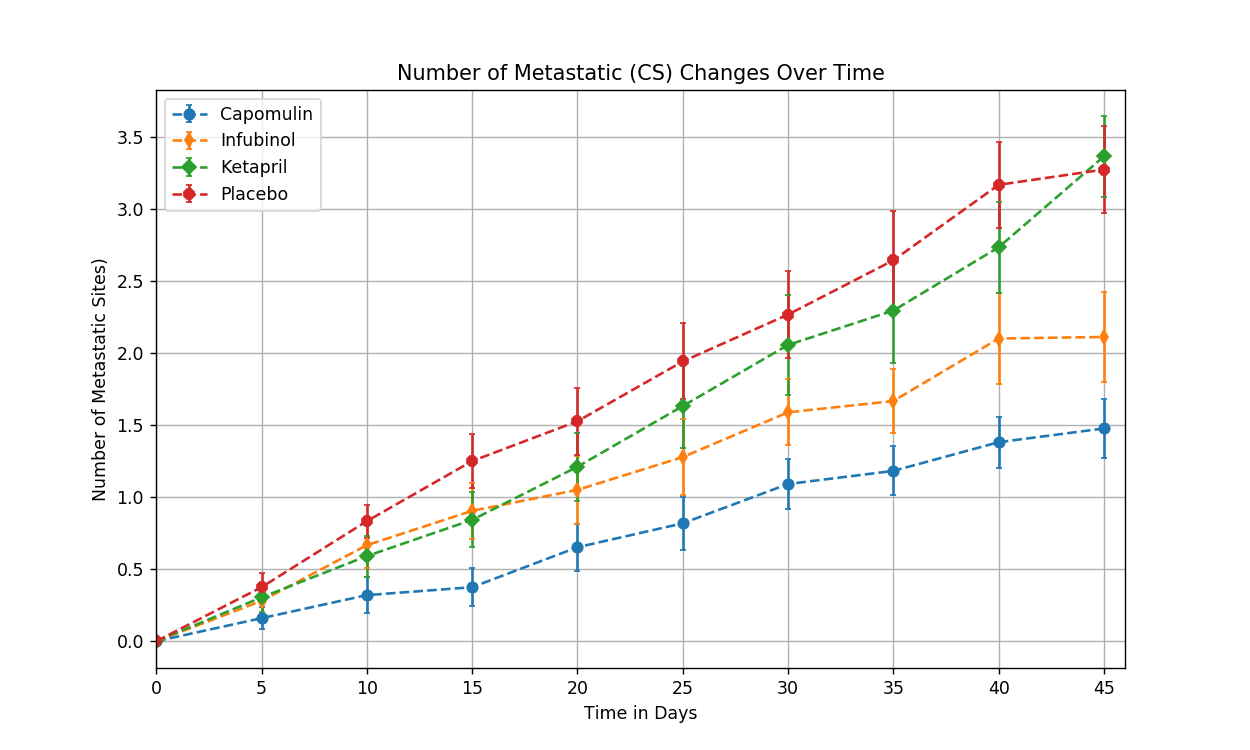

[ 0  5 10 15 20 25 30 35 40 45]


In [45]:
#chart info
plt.figure(figsize=(10,6))
charttitle_cs = "Number of Metastatic (CS) Changes Over Time"
xTitle_cs = "Time in Days"
yTitle_cs = "Number of Metastatic Sites)"
x_limit_cs = end_cs_range
#x_axis = np.arange(xcancerrange_df['Timepoint'].min(), xcancerrange_df['Timepoint'].max(), 5)
#maybe add 5 to the end range to give us a nice number 0-50???
x_cs_axis = np.arange(begin_cs_range, end_cs_range, step_cs_range)
print(x_cs_axis)


scat_cs_capomulin = plt.errorbar(x_cs_axis, drug_cs_capomulin, sem_cs_capomulin, linestyle='--', marker='o', capthick=1, capsize=2, label='Capomulin')
scat_cs_infubinol = plt.errorbar(x_cs_axis, drug_cs_infubinol, sem_cs_infubinol, linestyle='--', marker='d', capthick=1, capsize=2, label='Infubinol')
scat_cs_ketapril = plt.errorbar(x_cs_axis, drug_cs_ketapril, sem_cs_ketapril, linestyle='--', marker='D', capthick=1, capsize=2, label='Ketapril')
scat_cs_placebo = plt.errorbar(x_cs_axis, drug_cs_placebo, sem_cs_placebo, linestyle='--', marker='8', capthick=1, capsize=2, label='Placebo')


plt.title(charttitle_cs)
plt.xlabel(xTitle_cs)
plt.ylabel(yTitle_cs)
plt.xlim(0, x_limit_cs)
plt.xticks(x_cs_axis)

plt.legend(handles=[scat_cs_capomulin, scat_cs_infubinol, scat_cs_ketapril, scat_cs_placebo], loc="best")

plt.grid()
#plt.plot()
plt.show()









---
## Survival Rates Of Mice
  * Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate).
---


In [46]:

#get the count of mice within the timepoints, i believe that if they are on the timepoint and being given treatment then
#they are still alive 
sr_mice_df = main_df.groupby(['Drug','Timepoint']).count()
#['MouseId']
#get only the mouseid data
sr_mice_df = pd.DataFrame(sr_mice_df['MouseId'])
sr_mice_df.head(2)

MouseId
Drug      Timepoint         
Capomulin 0               25
          5               25

In [47]:
#pivot the survival rates of mice
sr_mice_results = sr_mice_df.unstack(level = 0)
sr_mice_results.head()

#how would you add the standard margin of error or does it even come into play for this?


MouseId                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19

In [48]:
#https://stackoverflow.com/questions/44890713/selection-with-loc-in-python
#get the index in as a list or array
#https://stackoverflow.com/questions/17241004/pandas-how-to-get-the-data-frame-index-as-an-array
sr_mice_results.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [49]:
#get the values for the timepoints on the XAXIS
xrange_sr_df = pd.DataFrame(sr_mice_results.index)

begin_sr_range = xrange_sr_df['Timepoint'].min()
print(f'Begin Range: {begin_sr_range}')

end_sr_range = xrange_sr_df['Timepoint'].max()+1
print(f'End Range: {end_sr_range}')

step_sr_range = 5
print(f'Step Range: {step_sr_range}')

#print(xcancerrange_df['Timepoint'].min())
#print(xcancerrange_df['Timepoint'].max())
#print((end_range+step_range))
#x_axis = np.arange(begin_range, end_range, step_range)
#x_axis

Begin Range: 0
End Range: 46
Step Range: 5


In [50]:
#chart info
charttitle_sr = "Survival Rates of Mice During Treatment"
xTitle_sr = "Survival Rate"
yTitle_sr = "Time in Days"

x_limit_sr = end_sr_range
print(x_limit_sr)

#x_axis = np.arange(xcancerrange_df['Timepoint'].min(), xcancerrange_df['Timepoint'].max(), 5)
#maybe add 5 to the end range to give us a nice number 0-50???
x_sr_axis = np.arange(begin_sr_range, end_sr_range, step_sr_range)
print(x_sr_axis)

46
[ 0  5 10 15 20 25 30 35 40 45]


In [51]:
drug_sr_capomulin = sr_mice_results[('MouseId', 'Capomulin')]
drug_sr_infubinol = sr_mice_results[('MouseId', 'Infubinol')]
drug_sr_ketapril = sr_mice_results[('MouseId', 'Ketapril')]
drug_sr_placebo = sr_mice_results[('MouseId', 'Placebo')]

<IPython.core.display.Javascript object>


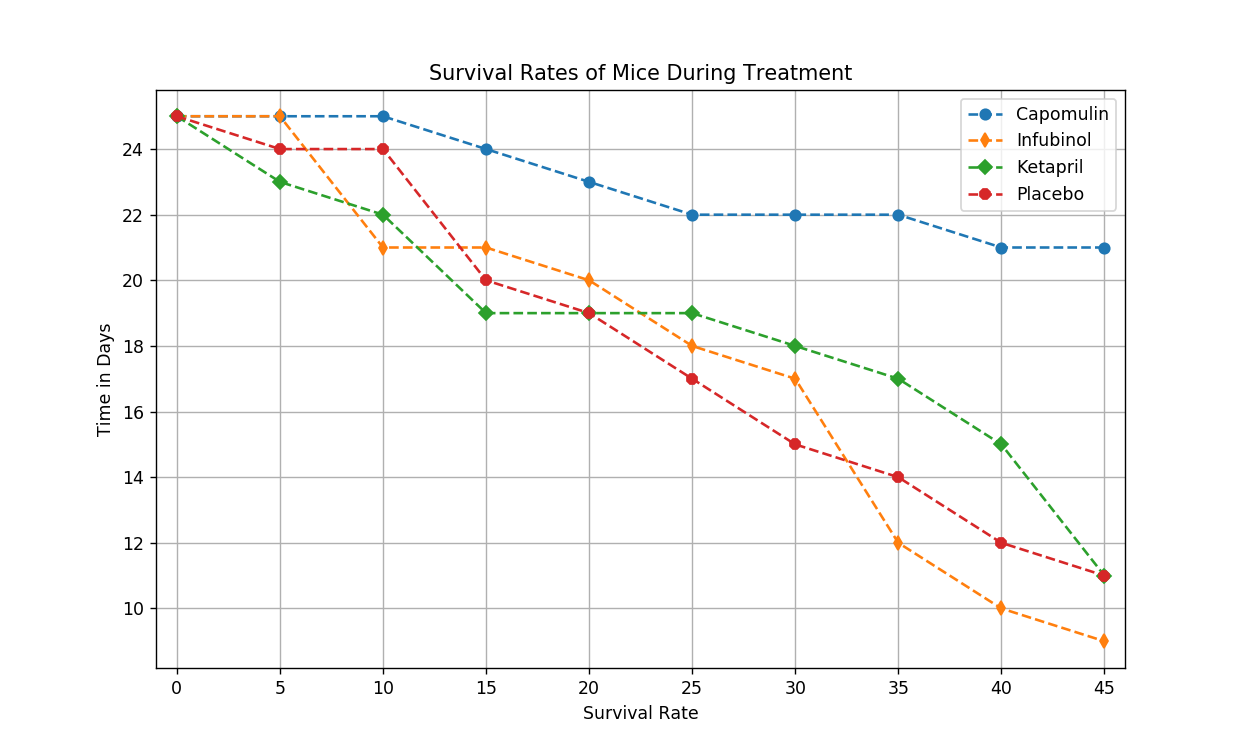

In [52]:
plt.figure(figsize=(10,6))

scat_sr_capomulin = plt.errorbar(x_sr_axis, drug_sr_capomulin, linestyle='--', marker='o', capthick=1, capsize=2, label='Capomulin')
scat_sr_infubinol = plt.errorbar(x_sr_axis, drug_sr_infubinol, linestyle='--', marker='d', capthick=1, capsize=2, label='Infubinol')
scat_sr_ketapril = plt.errorbar(x_sr_axis, drug_sr_ketapril, linestyle='--', marker='D', capthick=1, capsize=2, label='Ketapril')
scat_sr_placebo = plt.errorbar(x_sr_axis, drug_sr_placebo, linestyle='--', marker='8', capthick=1, capsize=2, label='Placebo')


#scatter plot 3
plt.title(charttitle_sr)
plt.xlabel(xTitle_sr)
plt.ylabel(yTitle_sr)
plt.xlim(-1, x_limit_sr)

plt.xticks(x_sr_axis)

plt.legend(handles=[scat_sr_capomulin, scat_sr_infubinol, scat_sr_ketapril, scat_sr_placebo], loc="best")

plt.grid()
#plt.plot()
plt.show()


---
## Tumor Volume Change For Each Drug Over Time
  * Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
---

In [53]:
tumorvolume_avg_df = main_df.groupby(['Drug', 'Timepoint']).mean()
tumorvolume_avg_df = pd.DataFrame(tumorvolume_avg_df['TumorVolume'])
tumorvolume_avg_df.head(2)

TumorVolume
Drug      Timepoint             
Capomulin 0            45.000000
          5            44.266086

In [54]:
#tumorvolume_avg_df.index
#pivot to get index values
#chaining here --> https://stackoverflow.com/questions/39038358/function-chaining-in-python
#tumorvalues = tumorvolume_avg_df.unstack(level = 0).index


tumorvalues = pd.DataFrame(tumorvolume_avg_df.unstack(level = 0))
tumorvalues

#tumorvolume_avg_df.head()

TumorVolume                                 
Drug        Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                             
0           45.000000  45.000000  45.000000  45.000000
5           44.266086  47.062001  47.389175  47.125589
10          43.084291  49.403909  49.582269  49.423329
15          42.064317  51.296397  52.399974  51.359742
20          40.716325  53.197691  54.920935  54.364417
25          39.939528  55.715252  57.678982  57.482574
30          38.769339  58.299397  60.994507  59.809063
35          37.816839  60.742461  63.371686  62.420615
40          36.958001  63.162824  66.068580  65.052675
45          36.236114  65.755562  70.662958  68.084082

In [55]:
#get the ranges in the timepoints
tumorranges = tumorvalues.index
tumorranges

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

In [56]:
#get the starting position of the array
tum_range_start = 0

In [57]:
#get the number of values in the array and subtract 1
print(len(tumorranges))
tum_range_end = len(tumorranges)-1
print(f'True Array length : {tum_range_end}')

10
True Array length : 9


In [83]:
#verify values are being calculated properly
percenttumor = (tumorvalues.iloc[tum_range_end,:] - tumorvalues.iloc[tum_range_start,:] ) / tumorvalues.iloc[tum_range_start,:] * 100 
#formula is end change - start change / start change * 100(for percentage)
percenttumor = pd.DataFrame(percenttumor)
percenttumor

0
            Drug                
TumorVolume Capomulin -19.475303
            Infubinol  46.123472
            Ketapril   57.028795
            Placebo    51.297960

In [90]:
#reset index, get rid of INDEX or level_0 indices
percenttumor = percenttumor.reset_index()
del percenttumor['index']
#del percenttumor['level_0']
percenttumor.head()

,Drug,0
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [91]:
#percenttumor = percenttumor.reset_index()
#del percenttumor['level_0']
#percenttumor.head()
percenttumor = percenttumor.rename(columns={0:'PercentChange'})
percenttumor.info()
percenttumor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
Drug             4 non-null object
PercentChange    4 non-null float64
dtypes: float64(1), object(1)
memory usage: 144.0+ bytes


,Drug,PercentChange
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


In [92]:
#get a list of plot values
col_percent_tumor = percenttumor['PercentChange']
col_percent_tumor

0   -19.475303
1    46.123472
2    57.028795
3    51.297960
Name: PercentChange, dtype: float64

In [93]:
#find the range of index
myrange = percenttumor.index
myrange

RangeIndex(start=0, stop=4, step=1)

In [94]:
#find the proper color based on percent value
#percentagecolors = []
#for value in percenttumor['PercentChange']:
#    #print(value)
#    if value < 0:
#        percentagecolors.append('blue')
#    else:
#        percentagecolors.append('red')
        
#now change into list comprehension
#https://stackoverflow.com/questions/4406389/if-else-in-a-list-comprehension
percentagecolors = [ 'blue' if perc <0 else 'red' for perc in percenttumor['PercentChange']]
        

In [95]:
#get the names from dframe
tt_ticknames=percenttumor['Drug']

In [96]:
tt_charttitle ='Tumor % Volume Change Over 45 Days'
tt_ylabel = 'Survival Rate in Percent'
tt_xlabel = 'Drugs Given'

tt_xticks = np.arange(0, len(percenttumor.index), 1)
tt_xticks

array([0, 1, 2, 3])

<IPython.core.display.Javascript object>


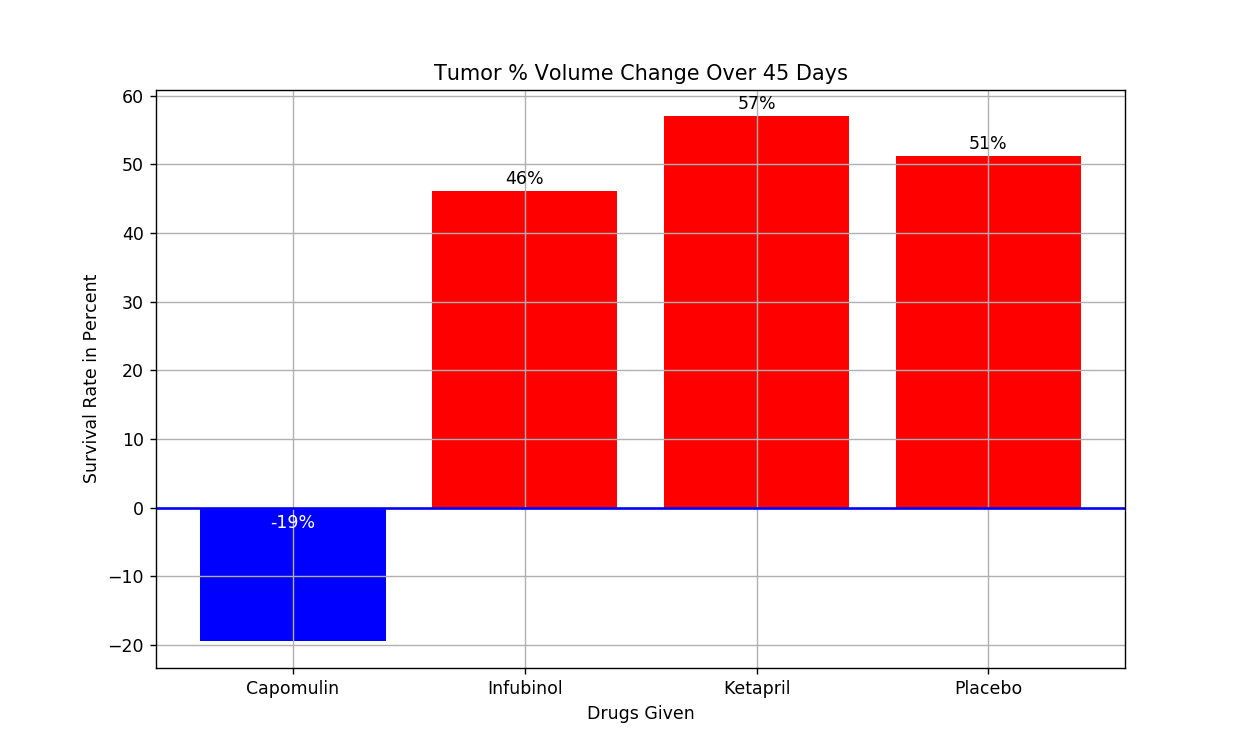

-19%
46%
57%
51%


In [97]:
plt.figure(figsize=(10,6))

#plain bar, todo: check values
#plt.bar(tt_xticks, col_percent_tumor)

#add the colors
plt.bar(tt_xticks, col_percent_tumor, color=percentagecolors)

#add tick values
plt.xticks(tt_xticks, tt_ticknames)

#add a line on zero
plt.axhline(y=0, color = 'blue')


plt.title(tt_charttitle)
plt.xlabel(tt_xlabel)
plt.ylabel(tt_ylabel)


#plt.text(count, y_coor, str(round(r, 1)) + '%', ha = 'center', color = 'white')
#plt.text(1, 5, 'PERCENTAGE%', ha = 'center', color = 'white')

#add a counter to track the row
i = 0

for row in percenttumor['PercentChange']:
    
    #print(row)
    numperc=round(row,2)
    #print("{0:.0f}%".format(tumorperc))
    tumorperc = "{0:.0f}%".format(numperc)
    #print(tumorperc)
    
    #plt.text(1, 5, 'PERCENTAGE%', ha = 'center', color = 'white')
    #plt.text(i, numperc, tumorperc,ha='center', color='black')

    #need to change the y value else all labels are on horizontal zero line
    if numperc < 0:
        yloc = -3
        ycolor = 'white'
    else:
        yloc = numperc + 1
        ycolor = 'black'
    
    plt.text(i, yloc, tumorperc,ha='center', color=ycolor)
    
    #increase counts
    i += 1

    
    
    #print(i)

plt.grid()
plt.show()

---
### Unit 5 | Pymaceuticals Inc - Aalvarez
While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
